In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from astropy.io import ascii

from matplotlib.patches import Rectangle

In [2]:
#Epoch 1
file_in = 'PS11aop_grid_e1+5A.csv'
data_plot = ascii.read(file_in)
D_L = 1070.1 # distance to SN in Mpc
date_expl =  55770.562 - 5 #55736.161 #inferred explosion date 
date_obs = 57307.08 # date that radio obs was taken
redshift = 0.218 # redshift of object
z=0.218
t_p = (date_obs - date_expl)/(1+redshift) # time of observation in days #1261.509031#

file_inc = 'PS11aop_grid_e2+5A.csv'
data_plotc = ascii.read(file_inc)

file_inb = 'PS11aop_grid_e3+5A.csv'
data_plotb = ascii.read(file_inb)
index2 = np.where(data_plotb['RuledOut'] == 'False')[0]
data_plot2b = data_plotb[index2]

#Allowed epoch 2
indexc = np.where(data_plotc['RuledOut'] == 'False')[0]
data_plot2 = data_plotc[indexc]
index2b = np.where(data_plot2['Radius'] < np.max(data_plot2b['Radius']))[0]
data_plot2d = data_plot2[index2b]
index3b = np.where(data_plot2d['v_shock'] > np.min(data_plot2b['v_shock']))[0]
data_plot2e = data_plot2d[index3b]


#Allowed epoch 1 by constrained epoch 2
indexa = np.where(data_plot['RuledOut'] == 'False')[0]
data_plota = data_plot[indexa]
index2a = np.where(data_plota['Radius'] < np.max(data_plot2e['Radius']))[0]
data_plot1a = data_plota[index2a]
index3a = np.where(data_plot1a['v_shock'] > np.min(data_plot2e['v_shock']))[0]
data_plot1aa = data_plot1a[index3a]

#Epoch 2
D_L = 1070.1 # distance to SN in Mpc
date_expl =  55770.562 - 5 #55736.161 #inferred explosion date
date_obs = 57829.76513 # date that radio obs was taken
redshift = 0.218 # redshift of object
z=0.218
t_p = (date_obs - date_expl)/(1+redshift) # time of observation in days #1261.509031#
file_inc = 'PS11aop_grid_e2+5A.csv'
data_plotc = ascii.read(file_inc)

file_inb = 'PS11aop_grid_e3+5A.csv'
data_plotb = ascii.read(file_inb)
index2 = np.where(data_plotb['RuledOut'] == 'False')[0]
data_plot2b = data_plotb[index2]

#Allowed
indexc = np.where(data_plotc['RuledOut'] == 'False')[0]
data_plot2 = data_plotc[indexc]
index2b = np.where(data_plot2['Radius'] < np.max(data_plot2b['Radius']))[0]
data_plot23 = data_plot2[index2b]
index3b = np.where(data_plot23['v_shock'] > np.min(data_plot2b['v_shock']))[0]
data_plot24 = data_plot23[index3b]

#Epoch 3
D_L = 1070.1 # distance to SN in Mpc
date_expl =  55770.562 - 5 #55736.161 #inferred explosion date 
date_obs = 59378.446209  # date that radio obs was taken
redshift = 0.218 # redshift of object
z=0.218
t_p = (date_obs - date_expl)/(1+redshift) # time of observation in days #1261.509031#
file_inb = 'PS11aop_grid_e3+5A.csv'
data_plot3b = ascii.read(file_inb)

#Allowed
index3b = np.where(data_plot3b['RuledOut'] == 'False')[0]
data_plot2b = data_plot3b[index3b]

In [3]:
#upper limit
#file_inc = 'PS11aop_grid_e2+5A_limit5.csv' #old
file_inc = 'PS11aop_grid_e2+5A_limit5_redoMdot.csv'  #new-used
data_plot = ascii.read(file_inc)

indexa = np.where(data_plot['RuledOut'] == 'False')[0]
data_plota = data_plot[indexa]
indexf = np.where(data_plota['Radius'] >= 4e15)[0] #based on allowed SED
data_plotf = data_plota[indexf]
denup = data_plotf['den']
radup = data_plotf['Radius'] #5.3803995391579976e+16 



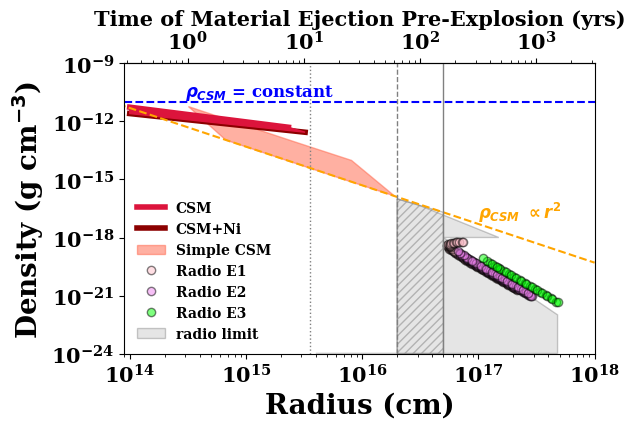

In [12]:
#5 days post explosion


## DENSITY PLOT:
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 30})
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rc('font', weight='bold')
figure, subplots = plt.subplots(1, 1, figsize=(7,5))
#figure.rcParams.update({'font.size': 10})


###PUT ON THE SHELL MATERIAL:

#THESE PLOTS LINES FOR THE FOUR MODELS:

#PS11aop: CSM
subplots.plot([1e14,2.32e15],[5.49*10.**(-12),5.03E-13],color='crimson',linewidth=4,label='CSM')

#PS11aop: CSM_NI
subplots.plot([1e14,3.23e15],[2.57*10.**(-12),2.78E-13],color='darkred',linewidth=4,label='CSM+Ni')

#THIS WILL FILL IN THE REGION BETWEEN THE MODELS FOR PS1-11aop. 

ps11aop_x = [1e14,2.32e15,3.23e15,1e14,1e14]
ps11aop_y = [5.49*10.**(-12),5.03E-13,2.78E-13,2.57*10.**(-12),2.57*10.**(-12)]
subplots.fill(ps11aop_x,ps11aop_y,color='crimson',alpha=1,zorder=2)

#SIMPLE CSM model
simple_x = [3.2e14,2.6e15,8.1e15,1.9e16,6.1e15,6.7e14,3.2e14]
simple_y = [5.9e-12,9.0e-14,9.7e-15,1.4e-16,1.3e-15,1.1e-13,5.9e-12]
subplots.fill(simple_x,simple_y,color='tomato',alpha=0.5,zorder=1,label='Simple CSM')

#Dashed Lines connecting optical to radio:
#subplots.plot([2.39e15,2.2e+16],[5.6155e-13,1e-19],color='crimson',linestyle=':')
#subplots.plot([3.09e15,2.2e16],[2.3155e-13,1e-19],color='darkred',linestyle=':')
#subplots.plot([1.22e15,2.60355962868e+16],[3.67668e-13,5.5e-20],color='turquoise',linestyle=':')

### GET ON THE RADIO EMISSION: 

### PS1-11aop EPOCH #1:
date_expl =  55770.562 - 5 #55736.161 #inferred explosion date
date_obs = 57307.08 # date that radio obs was taken
redshift = 0.218 # redshift of object
z = 0.218
t_p = (date_obs - date_expl)/(1+redshift) # time of observation in days #1261.509031#


indexv1 = (data_plot1aa['v_shock'] <= 20000)
PS11aop_rad1 = data_plot1aa[indexv1]['Radius']
PS11aop_den1 = data_plot1aa[indexv1]['den']

subplots.plot(PS11aop_rad1,PS11aop_den1,'o',color='pink',alpha=0.5,markeredgecolor='k',lw=3,label='Radio E1')

###PS1-11aop e2:
D_L = 1070.1 # distance to SN in Mpc
date_expl =  55770.562 - 5 #55736.161 #inferred explosion date
date_obs2 = 57829.76513 # date that radio obs was taken
redshift = 0.218 # redshift of object

t_p = (date_obs2 - date_expl)/(1+redshift) # time of observation in days #1261.509031#
indexv2 = (data_plot24['v_shock'] <= 20000)
PS11aop_rad2 = data_plot24[indexv2]['Radius']
PS11aop_den2 = data_plot24[indexv2]['den']
subplots.plot(PS11aop_rad2,PS11aop_den2,'o',color='violet',alpha=0.5,markeredgecolor='k', lw=3,label='Radio E2')

#upper limit
#subplots.plot(radup,denup,'o',color='c',alpha=0.5,markeredgecolor='k', lw=1,label='Radio-up E2')

###PS1-11aop e3:
D_L = 1070.1 # distance to SN in Mpc
date_expl =  55770.562 - 5 #55736.161 #inferred explosion date
date_obs3 = 59378.446209 # date that radio obs was taken
redshift = 0.218 # redshift of object

t_p = (date_obs3 - date_expl)/(1+redshift) # time of observation in days #1261.509031#
indexv3 = (data_plot2b['v_shock'] <= 20000)
PS11aop_rad3 = data_plot2b[indexv3]['Radius']
PS11aop_den3 = data_plot2b[indexv3]['den']
subplots.plot(PS11aop_rad3,PS11aop_den3,'o',color='lime', alpha=0.5,markeredgecolor='k',lw=3,label='Radio E3')

### Put on r^-2 wind-like environment and constant CSM:
r = np.arange(start=0.01, stop=20000)*1e15
import itertools
den1=list(itertools.repeat(1e-11, 20000))
den2 = 5e16*r**(-2)
subplots.plot(r,den2, linestyle = '--', color = 'orange')
subplots.plot(r,den1,linestyle = '--', color = 'blue')

#upper limit extra parameter space
#radlimx = [4e15,4e15,2e16,2e16,3e16,4.8014e17,4.8014e17,2.5e15]
#radlimy = [1e-24, 3e-16,1e-17,1e-18,1e-19,4.03121e-23, 1e-24,1e-24]
#2e16: 1e-15,
radlimx = [2e16,2e16,3e16,1.5e17,5e16,4.8014e17,4.8014e17,4e15]
radlimy = [1e-24, 1e-16,5e-17,1e-18,1e-18,1e-22, 1e-24,1e-24]
subplots.fill(radlimx,radlimy,facecolor='gray',alpha=0.2,zorder=1, edgecolor='k',label='radio limit')

#Add shading to the radio area indicating upper limits
#epoch 1 
simple_x1 = [5.3803e16,2.15618e17,2.1561e17,5.3803e16]
simple_y1 = [6.0757e-19,1.9178e-21, 1e-24, 1e-24]
#subplots.fill(simple_x1,simple_y1,facecolor='none', hatch='|||', edgecolor='pink') #hatch='|||', hatch='xxx'
#epoch 2 
simple_x2 = [6.7313e16,2.871357e17,2.871357e17,6.7313e16]
simple_y2 = [1.95342e-19,8.9020e-22, 1e-24, 1e-24]
#subplots.fill(simple_x2,simple_y2,facecolor='none', hatch='////', edgecolor='violet')
#epoch 3 
simple_x3 = [1.097e17,4.8014e+17,4.8014e17,1.097e17]
simple_y3 = [8.4823e-20,4.5107e-22, 1e-24, 1e-24]
#subplots.fill(simple_x3,simple_y3,facecolor='none', hatch='xxx', edgecolor='lime')

#Add important timelines
plt.vlines(x=2e16, ymin=1e-24,ymax=1e-8,color='gray',lw=1,linestyle='--',)#label='2nd S-357d')
plt.vlines(x=35.8401e14, ymin=1e-24,ymax=1e-8,color='gray',lw=1,linestyle=':',)# label=r'innermost $R_{CSM}$')
plt.vlines(x=5e16, ymin=1e-24,ymax=1e-8,color='gray',lw=1,linestyle='-',)#theoretically predicted lowest radius for 2nd epoch
simple_x4 = [2e16,2e16,5e16,5e16]
simple_y4 = [1e-24, 1e-16, 2e-17, 1e-24]
subplots.fill(simple_x4,simple_y4,facecolor='none', hatch='////', edgecolor='gray',alpha=0.5)

### SHOW THE HIGHLIGHTS OF REGIONS/LABELS: 
#r1e = Rectangle((1e13,1e-28),1.0e16,9.999e-10,color='coral',alpha=0.1,zorder=1)
#r3e = Rectangle((1e16,1e-28),1.9e+19,9.999e-10,color='xkcd:turquoise',alpha=0.1,zorder=1)
#r5e = Rectangle((1e17,1e-24),6e+17,9.999e-10,color='xkcd:olive',alpha=0.1,zorder=1)
#subplots.add_patch(r1e)
#subplots.add_patch(r3e)

subplots.set_xscale('log')
subplots.set_yscale('log')
subplots.set_xlabel(r'Radius (cm)', fontsize=20,fontweight ='bold') #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
subplots.set_ylabel(r'Density (g cm$^{-3}$)', fontsize=20,fontweight ='bold')    
subplots.title.set_fontsize(16) 

#plot limit
subplots.set_xlim(0.9e14,1e18)
subplots.set_ylim(1e-24,1e-9)
#subplots.text(1.75e14,1e-15,'Dense Shell',fontsize=12,fontweight='bold')
#subplots.text(1.75e14,1e-15,'Optical',fontsize=12,fontweight='bold')
subplots.text(3e14,2e-11,r'$\rho_{CSM}$ = constant',fontsize=12,color='blue')

#subplots.text(1.4e16,1e-15,'Wind-like',fontsize=12,fontweight='bold')
#subplots.text(3.4e16,1e-15,'Radio',fontsize=12,fontweight='bold')
subplots.text(1e17,1e-17,r'$\rho_{CSM}$ $\propto r^{2}$',fontsize=12,color = 'orange')

def rad2time(x):
    return x/100e5/86400./365.  #time (years) = radius(cm) /wind speed (100km/s---> 100e5 cm/s)


def time2rad(x):
    return x*365*86400.*100e5   #radius (cm) = time(years) *wind speed

secax = subplots.secondary_xaxis('top', functions=(rad2time, time2rad))
secax.set_xlabel('Time of Material Ejection Pre-Explosion (yrs)', fontsize =15,fontweight ='bold')
plt.tight_layout()
plt.legend(loc='lower left', fontsize=10,frameon=False)
plt.savefig('densityplot2a5.png',dpi = 500,bbox_inches='tight', transparent = True)

#plt.show()
